<a href="https://colab.research.google.com/github/luisantoniococa/Spark_Big_Data_Amazon_Reviews_Analysis/blob/master/Amazon_reviews_bigdata_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install Java, Spark, and Findspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

In [2]:
!wget https://jdbc.postgresql.org/download/postgresql-42.2.9.jar

--2020-04-15 18:32:59--  https://jdbc.postgresql.org/download/postgresql-42.2.9.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 914037 (893K) [application/java-archive]
Saving to: ‘postgresql-42.2.9.jar’

postgresql-42.2.9.j 100%[===================>] 892.61K  3.89MB/s    in 0.2s    

2020-04-15 18:33:00 (3.89 MB/s) - ‘postgresql-42.2.9.jar’ saved [914037/914037]



In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CloudETL").config("spark.driver.extraClassPath","/content/postgresql-42.2.9.jar").getOrCreate()

In [5]:
# first it connects to the database that was created earlier and extract infomation into a dataframe
vine_df = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://<endpoint>:5432/Amazon_reviews_db") \
    .option("dbtable", "vines") \
    .option("user", "<user>") \
    .option("password", "<password>") \
    .option("driver", "org.postgresql.Driver") \
    .load()
# print the schemata from the database
vine_df.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- star_rating: string (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)



In [6]:
# show first 15 values in df
vine_df.show(15)

+--------------+-----------+-------------+-----------+----+
|     review_id|star_rating|helpful_votes|total_votes|vine|
+--------------+-----------+-------------+-----------+----+
|R135Q3VZ4DQN5N|          5|            0|          0|   N|
|R2N0QQ6R4T7YRY|          5|            0|          0|   N|
|R3N5JE5Y4T6W5M|          5|            0|          0|   N|
|R2I150CX5IVY9Q|          5|            0|          0|   N|
|R1RM9ICOOA9MQ3|          5|            0|          0|   N|
|R2J2KMDL10UMSH|          5|            0|          0|   N|
|R3R9ZUFA4TB4FQ|          5|            0|          0|   N|
|R3UQ8VAQN7R6WL|          5|            0|          0|   N|
|R1FXZ69C01JNQM|          5|            0|          0|   N|
| RY36LB4OW0FFS|          5|            0|          0|   N|
| R6PKS54PC6ZY2|          1|            4|          4|   N|
|R1LYSAH0IECVWB|          5|            0|          0|   N|
|R1UN0IZI3XQ3E2|          5|            2|          3|   N|
| RIKDXD8QGL99S|          5|            

In [7]:
# filtering helpful reviews, 20 votes or more and have at least 50% positive votes
helpful_df = vine_df.filter(vine_df['total_votes']>=20)

helpful_df2 = helpful_df.filter(helpful_df['helpful_votes']/helpful_df['total_votes']>= 0.5)
helpful_df2.show()

+--------------+-----------+-------------+-----------+----+
|     review_id|star_rating|helpful_votes|total_votes|vine|
+--------------+-----------+-------------+-----------+----+
|R16YC6SMGKA8SR|          5|           23|         23|   N|
| R5O4WE9UM60B0|          1|           29|         29|   N|
|R2EKRVCRC7U0IY|          1|           22|         24|   N|
|R2OKV47GETH0L7|          5|           24|         24|   N|
| R36LII9IITE17|          1|           22|         24|   N|
|R35VKNE16PFY0H|          5|           22|         24|   N|
|R3TG008LHHZZIN|          5|          123|        125|   N|
|R2FYQBKCC1XG4M|          5|           20|         20|   N|
| R63PV336NI5X7|          1|           27|         28|   N|
|R1R42WPHB5ZSWI|          5|           51|         52|   N|
| RXSS0QZJE1TEO|          1|           35|         35|   N|
| RGS9C5XKWVYP9|          1|           24|         24|   N|
|R3R5BWMKH1EUIQ|          5|           26|         27|   N|
|R2KBDT7RGO1G86|          3|           3

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


+--------------+-----------+-------------+-----------+----+
|     review_id|star_rating|helpful_votes|total_votes|vine|
+--------------+-----------+-------------+-----------+----+
|R16YC6SMGKA8SR|          5|           23|         23|   N|
| R5O4WE9UM60B0|          1|           29|         29|   N|
|R2EKRVCRC7U0IY|          1|           22|         24|   N|
|R2OKV47GETH0L7|          5|           24|         24|   N|
| R36LII9IITE17|          1|           22|         24|   N|
|R3TG008LHHZZIN|          5|          123|        125|   N|
|R35VKNE16PFY0H|          5|           22|         24|   N|
| R63PV336NI5X7|          1|           27|         28|   N|
|R2FYQBKCC1XG4M|          5|           20|         20|   N|
| RGS9C5XKWVYP9|          1|           24|         24|   N|
|R3R5BWMKH1EUIQ|          5|           26|         27|   N|
|R1V4IQ6DBQQVVM|          5|           31|         33|   N|
| R8E254ARTMOH2|          5|           42|         42|   N|
| R6HKG5VVEAFPQ|          5|           2

,review_id,star_rating,helpful_votes,total_votes,vine
0,R16YC6SMGKA8SR,5,23,23,N
1,R5O4WE9UM60B0,1,29,29,N
2,R2EKRVCRC7U0IY,1,22,24,N
3,R2OKV47GETH0L7,5,24,24,N
4,R36LII9IITE17,1,22,24,N


In [0]:
for_plot_helpful_df2 = helpful_df2.limit(25)
for_plot_helpful_df2.show()
for_plot_helpful_df2 = for_plot_helpful_df2.toPandas()
for_plot_helpful_df2.head()

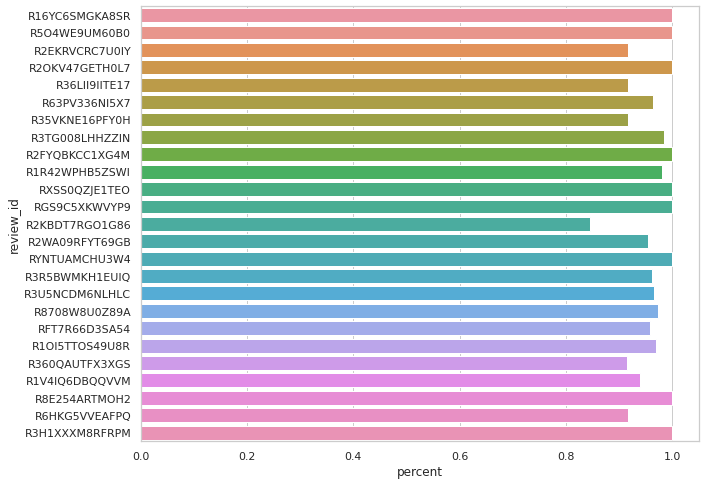

In [26]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 8 ))
for_plot_helpful_df2['percent'] = for_plot_helpful_df2['helpful_votes']/for_plot_helpful_df2['total_votes']

ax = sns.barplot(y="review_id", x="percent", data=for_plot_helpful_df2,orient = 'h',ci=float)




In [0]:
# Two dataframes were created for vine and non-vine reviews and then used describe was used to extract basic statistical information

